In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

In [2]:
# update_time 데이터프레임 생성, 10분 단위로 생성
date = pd.date_range('2023-10-01 00:00:00', periods=1350, freq='10T')

# 임시 데이터 만들기
q1 = pd.DataFrame()
q1['a'] = 1

# 데이터 합치기
q = pd.DataFrame(q1, index = date)

# datetimeindex를 변수로 변경
q.reset_index(drop=False, inplace=True)

# 필요없는 변수 삭제
del q['a']

# 변수명 변경
q.rename(columns = {'index' : 'update_time'}, inplace = True)
q

,update_time
0,2023-10-01 00:00:00
1,2023-10-01 00:10:00
2,2023-10-01 00:20:00
3,2023-10-01 00:30:00
4,2023-10-01 00:40:00
...,...
1345,2023-10-10 08:10:00
1346,2023-10-10 08:20:00
1347,2023-10-10 08:30:00
1348,2023-10-10 08:40:00


##### 일주일 + 3일(342) 만들기
- 약 50개 정도의 noise

In [38]:
r_data = np.random.normal(80, 12.5, 1350) 
r = pd.DataFrame()
r['a'] = r_data
print((len(r[(r['a']<60)|(r['a']>100)]))/len(r))

0.09703703703703703


In [39]:
# 한 분포에서 추출하기
# train
df = pd.DataFrame()

# 각 변수 생성과 데이터프레임 병합
for i in range(1, 1001):
   # 각 변수별로 다른 random seed 설정
   np.random.seed(i)
   
   # 정규분포 랜덤 추출
   # 일주일치 1008개
   r_data = np.random.normal(80, 12.5, 1350) 
   r_data = r_data.astype(int)    
   
   # 변수명 생성 
   var_name = f'heart_rate{i}'
   
   # 데이터프레임에 변수 추가
   df[var_name] = r_data
   
   # event로 변수 생성
   df[f'event{i}'] = df[var_name].apply(lambda x: 1 if (x < 60 )|(x > 100) else 0 if 60 <= x <= 100 else x)
   
   # 변수(본포{i})마다 행 순서 바꾸기
   np.random.seed(i)
   df = df.sample(frac=1)
   
print(df.shape)

(1350, 2000)


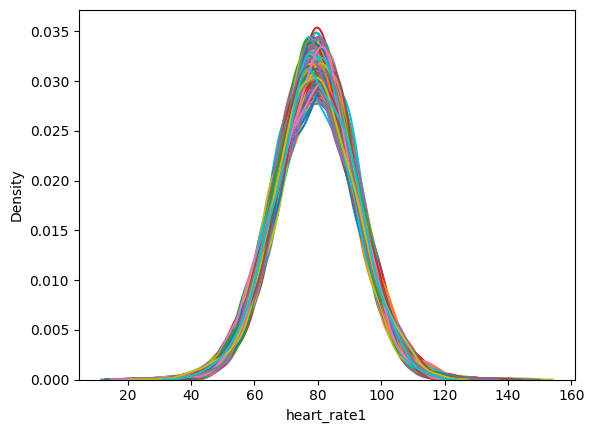

In [40]:
for i in range(1,1001):
    sns.kdeplot(df[f'heart_rate{i}'])

In [41]:
df.set_index(q['update_time'], inplace=True)
df

,heart_rate1,event1,heart_rate2,event2,heart_rate3,event3,heart_rate4,event4,heart_rate5,event5,...,heart_rate996,event996,heart_rate997,event997,heart_rate998,event998,heart_rate999,event999,heart_rate1000,event1000
update_time,,,,,,,,,,,,,,,,,,,,,
2023-10-01 00:00:00,70,0,107,1,76,0,76,0,99,0,...,83,0,83,0,61,0,63,0,85,0
2023-10-01 00:10:00,66,0,67,0,104,1,95,0,99,0,...,93,0,82,0,89,0,91,0,89,0
2023-10-01 00:20:00,95,0,92,0,105,1,87,0,81,0,...,89,0,91,0,92,0,78,0,89,0
2023-10-01 00:30:00,85,0,73,0,88,0,81,0,77,0,...,87,0,75,0,83,0,61,0,93,0
2023-10-01 00:40:00,87,0,74,0,64,0,83,0,108,1,...,69,0,85,0,81,0,87,0,72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-10 08:10:00,84,0,99,0,77,0,58,1,102,1,...,85,0,105,1,84,0,88,0,90,0
2023-10-10 08:20:00,72,0,79,0,89,0,76,0,84,0,...,82,0,94,0,94,0,74,0,68,0
2023-10-10 08:30:00,83,0,91,0,105,1,95,0,77,0,...,90,0,78,0,62,0,91,0,85,0


In [42]:
df.to_csv('../data/normal_simulation_10.csv')